In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
# import necessary packages
import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import os
import glob
import cv2
import numpy as np
from skimage import data, io, filters
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D
from keras.utils import np_utils

In [48]:
#to Read image from Dataset folder
def getListOfFiles(dirName):
    # create a list of file and sub directories
    # names in the given directory
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)

    return allFiles

In [49]:
#To set path of the images from the Google Drive
#imagePaths = getListOfFiles("/content/drive/MyDrive/dataset")## Folder structure: dataset --> sub-folders with labels name
#imagePaths = list(paths.list_images("/content/drive/MyDrive/Image/ML/dataset"))
#print(imagePaths)
#To set path of the images from the Google Drive
#imagePaths = getListOfFiles("/content/drive/MyDrive/Image/ML/#dataset")## Folder structure: dataset --> sub-folders with labels name
imagePaths = list(paths.list_images("/content/drive/MyDrive/Image/ML/dataset"))
print(imagePaths)

['/content/drive/MyDrive/Image/ML/dataset/paddy/Paddy (4).jpg', '/content/drive/MyDrive/Image/ML/dataset/paddy/Paddy (10).jpg', '/content/drive/MyDrive/Image/ML/dataset/paddy/Paddy (50).jpg', '/content/drive/MyDrive/Image/ML/dataset/paddy/Paddy (61).jpg', '/content/drive/MyDrive/Image/ML/dataset/paddy/Paddy (52).jpg', '/content/drive/MyDrive/Image/ML/dataset/paddy/Paddy (41).jpg', '/content/drive/MyDrive/Image/ML/dataset/paddy/Paddy (69).jpg', '/content/drive/MyDrive/Image/ML/dataset/paddy/Paddy (73).jpg', '/content/drive/MyDrive/Image/ML/dataset/paddy/Paddy (7).jpg', '/content/drive/MyDrive/Image/ML/dataset/paddy/Paddy (58).jpg', '/content/drive/MyDrive/Image/ML/dataset/paddy/Paddy (55).jpg', '/content/drive/MyDrive/Image/ML/dataset/paddy/Paddy (57).jpg', '/content/drive/MyDrive/Image/ML/dataset/paddy/Paddy (53).jpg', '/content/drive/MyDrive/Image/ML/dataset/paddy/Paddy (11).jpg', '/content/drive/MyDrive/Image/ML/dataset/paddy/Paddy (15).jpg', '/content/drive/MyDrive/Image/ML/dataset/

In [50]:
#To read and preprocess image data
data = []
lables = []
c = 0 ## to see the progress
for image in imagePaths:

    lable = os.path.split(os.path.split(image)[0])[1]
    lables.append(lable)

    img = cv2.imread(image)
    img = cv2.resize(img, (32, 32), interpolation = cv2.INTER_AREA)
    img = filters.sobel(img )
    print(img.shape)
    data.append(img)
    c=c+1
    

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32,

In [51]:
# encode the labels as integer
data = np.array(data)
print(data.shape)
lables = np.array(lables)

(962, 32, 32, 3)


In [52]:
le = LabelEncoder()
lables = le.fit_transform(lables)

myset = set(lables)
print(myset)

{0, 1}


In [53]:
#Splitting of dataset into training and test dataset
(trainX, testX, trainY, testY ) = train_test_split(data, lables, test_size= 0.25, random_state=42)
trainY=trainY.reshape(len(trainY),1)
testY=testY.reshape(len(testY),1)
print("X_train shape", trainX.shape)
print("y_train shape", trainY.shape)
print("X_test shape", testX.shape)
print("y_test shape", testY.shape)
#trainX = trainX.reshape(trainX.shape[0], 28, 28, 1)
#testX = testX.reshape(testX.shape[0], 28, 28, 1)
#trainX = trainX.astype('float32')
#testX = testX.astype('float32')
#plt.imshow(trainX[2,:])
#trainX /= 255
#testX /= 255


X_train shape (721, 32, 32, 3)
y_train shape (721, 1)
X_test shape (241, 32, 32, 3)
y_test shape (241, 1)


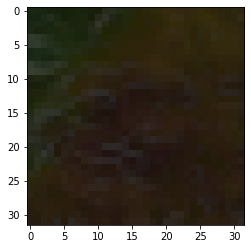

In [54]:
plt.imshow(trainX[100,:])
plt.show()

In [108]:
model = Sequential()
model.add(Conv2D(24, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(32,32,3)))

model.add(MaxPool2D(pool_size=(1,1)))
model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(24, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [123]:
model.summary()
model.compile(loss='BinaryCrossentropy', metrics=['accuracy'], optimizer='adam')
model.fit(trainX, trainY, batch_size=16, epochs=5, validation_data=(testX, testY))

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 24)        672       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 30, 30, 24)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 30, 30, 32)        6944      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 15, 15, 24)        6936      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 7, 7, 24)       

In [121]:
model.evaluate(testX, testY)
# Evaluate the model
scores = model.evaluate(testX, testY)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

8/8 [==============================] - 0s 23ms/step - loss: 0.6932 - accuracy: 0.4730

Accuracy: 47.30%
